In [1]:
import pandas as pd
from pathlib import Path

from classifier.training.utils import set_seed

set_seed(42)

SRC_DATASET_ROOT = Path('./fn-content-dataset')
SRC_DATASET_NAME = 'images__bodyparts.parquet'

In [2]:
df = pd.read_parquet(SRC_DATASET_NAME)
df

,file_name,asshole,belly_button,cum,hairy_pussy,labia,wet_pussy,tongue,ass,balls,boobs,brown_pussy,dick,feet,lower_legs,nipples,pussy,pink_pussy,pussy_closeup,shaved_pussy
0,0.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1.jpg,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,2.jpg,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
3,3.jpg,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1
4,4.jpg,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625140,625140.jpg,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1
625141,625141.jpg,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1
625142,625142.jpg,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1
625143,625143.jpg,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


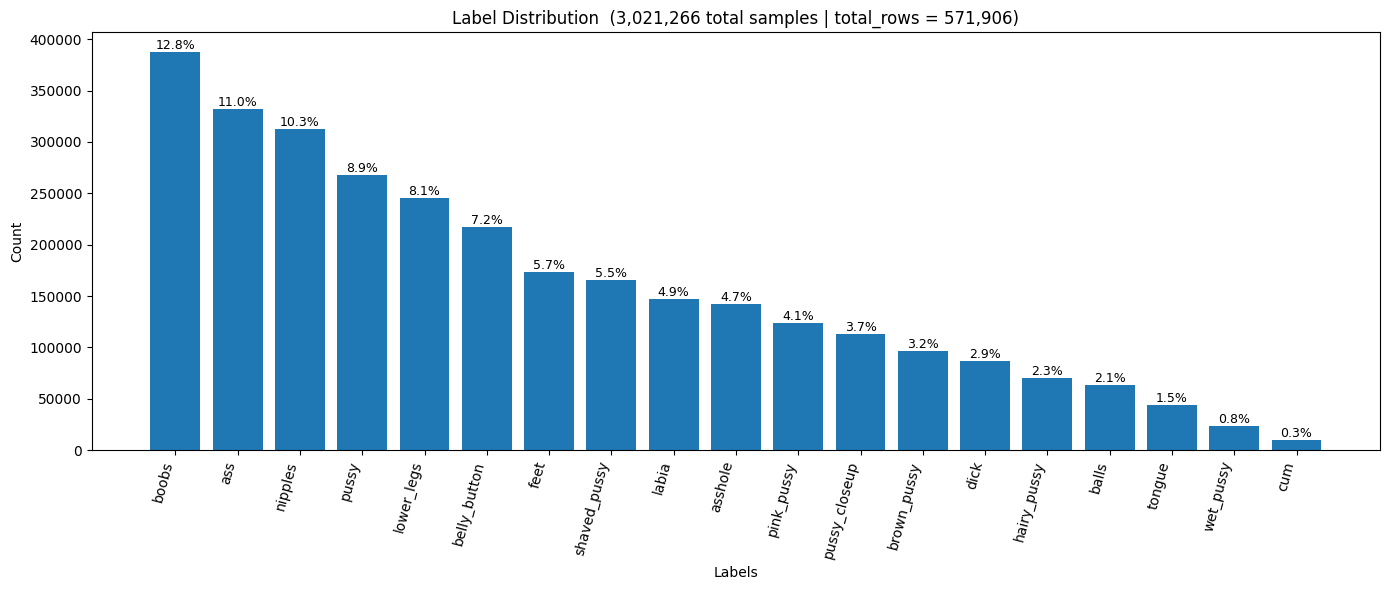

In [3]:
from notebooks.notebook_utils import plot_label_dist

filtered_counts = plot_label_dist(df.drop(['file_name'], axis=1))

In [4]:
df = df.drop(['cum', 'wet_pussy'], axis=1, inplace=False)
df.reset_index(drop=True, inplace=True)
df

,file_name,asshole,belly_button,hairy_pussy,labia,tongue,ass,balls,boobs,brown_pussy,dick,feet,lower_legs,nipples,pussy,pink_pussy,pussy_closeup,shaved_pussy
0,0.jpg,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1.jpg,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,2.jpg,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
3,3.jpg,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1
4,4.jpg,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571901,625140.jpg,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
571902,625141.jpg,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1
571903,625142.jpg,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1
571904,625143.jpg,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0


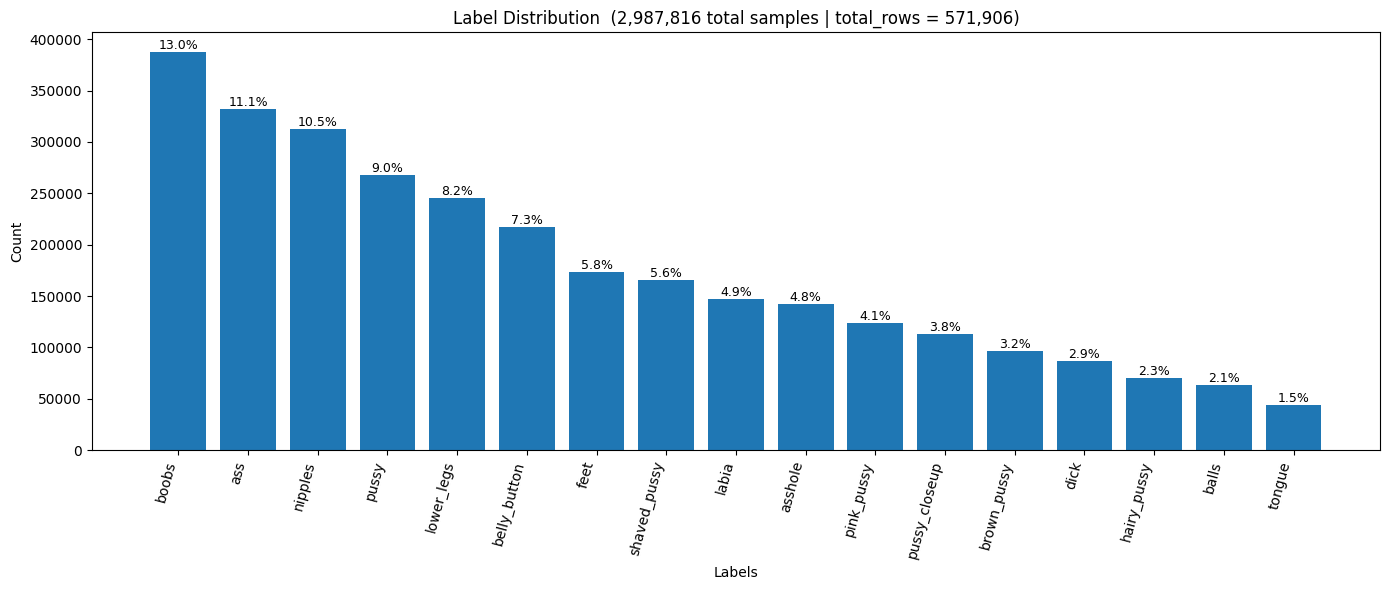

In [5]:
filtered_counts = plot_label_dist(df.drop(['file_name'], axis=1))

In [6]:
majors = ['boobs', 'ass', 'nipples', 'pussy', 'lower_legs', 'belly_button', 'feet', 'shaved_pussy', ]
bodyparts_major = df[['file_name'] + majors]
bodyparts_minor = df.drop(majors, axis=1, inplace=False)
bodyparts_major.shape, bodyparts_minor.shape

((571906, 9), (571906, 10))

In [7]:
def remove_empty_rows(dataframe: pd.DataFrame):
    non_empty_rows = dataframe.drop(['file_name'], axis=1).sum(axis=1) != 0
    return dataframe.loc[non_empty_rows]


bodyparts_major = remove_empty_rows(bodyparts_major)
bodyparts_minor = remove_empty_rows(bodyparts_minor)

bodyparts_major.shape, bodyparts_minor.shape

((560012, 9), (280322, 10))

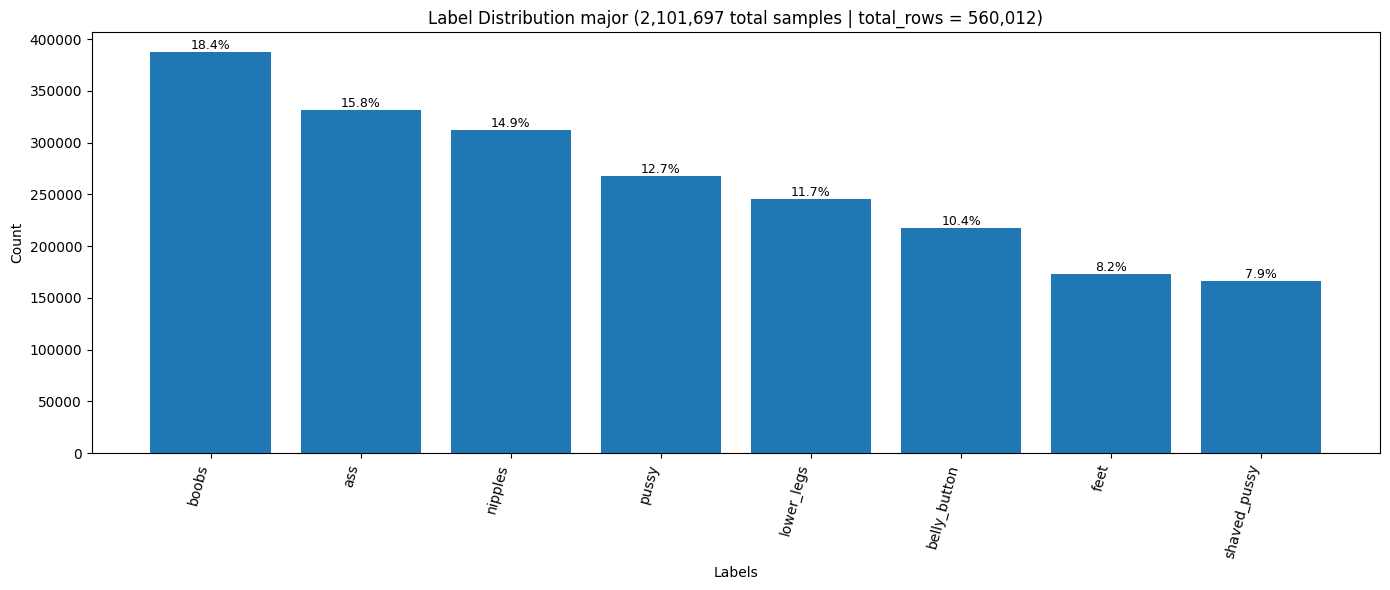

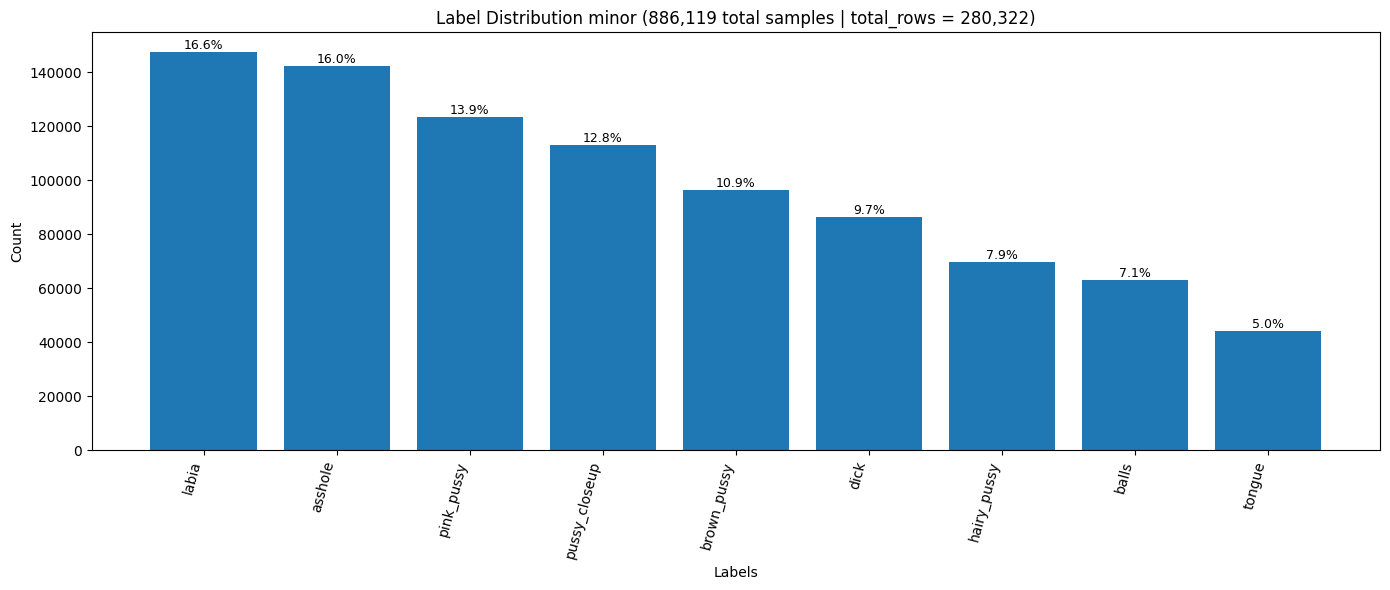

In [8]:
_ = plot_label_dist(bodyparts_major, 'major')
_ = plot_label_dist(bodyparts_minor, 'minor')

In [9]:
bodyparts_major.to_parquet('/Users/milosz/Projects/fn-classifier-final/datasets/bodyparts_major_dataset.parquet')
bodyparts_minor.to_parquet('/Users/milosz/Projects/fn-classifier-final/datasets/bodyparts_minor_dataset.parquet')